Handling Missing Values
Introduction to Handling Missing Values
In this series, we will discuss feature engineering techniques, starting with how to handle missing values. It is important to understand that in real-world scenarios, especially when working for companies, the data you receive will often be messy and contain many missing values.

Why Do Missing Values Occur?
Missing values occur in a dataset when some information is not stored for a variable. For example, if a survey form is given to a sample of people and someone is not comfortable filling a particular field, they may leave it empty, resulting in missing values in the dataset.

Mechanisms of Missing Data
There are three mechanisms by which missing values occur:

Missing Completely at Random (MCAR):

The probability of a value being missing is unrelated to both observed and missing data.
There is no specific reason for the missing data; it may be due to errors from data entry operators or machines.
The missing values are randomly distributed through the dataset.

Missing at Random (MAR):

The probability of a value being missing depends only on the observed data.
There is a systematic relationship between the missingness and other observed variables.
For example, men may not be comfortable disclosing their salary, and women may not be comfortable disclosing their age in a survey.

Missing Not at Random (MNAR):

The probability of a value being missing depends on the value of the missing data itself or on unmeasured factors associated with the missing values.
For example, employees less satisfied with their jobs may be less likely to report their income

Handling Missing Values — Short Notes
Why Missing Values Happen?

Data real life mein messy hota hai. Kabhi survey mein log kuch fields fill nahi karte, kabhi data entry error hota hai — isliye missing values aa jati hain.

Types / Mechanisms of Missing Data
1️⃣ MCAR — Missing Completely at Random

Missing hona purely random hota hai.

Koi pattern nahi hota.

Example: Data entry operator ne galti se ek value skip kar di.

👉 Analysis easy hota hai because bias nahi hota.

2️⃣ MAR — Missing at Random

Missingness kisi dusre observed variable par depend karta hai.

Example:

Men salary fill nahi karna chahte

Women age disclose nahi karti

Pattern hai, but missing value ka khud ka value unknown pattern create nahi karta.

👉 Thoda manageable with statistical methods.

3️⃣ MNAR — Missing Not at Random

Missingness us value ke khud ke reason ki wajah se hoti hai.

Example:

Low salary wale log income nahi likhte

Depressed patients questionnaire skip karte

👉 Most difficult type — special handling required.

In [4]:
##Examples 

In [5]:
import seaborn as sns

In [6]:
df=sns.load_dataset("titanic")

# seaborns load_datset is 
# used to load built in sample data sets 
# like titanic iris etc 
# these datasets are stroed in the librries itself

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
##Check missing values 
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
##Delte the rows or data pointss to handle missing values 
# but theres a problem we willl loose use amount of data
df.shape

(891, 15)

In [10]:
df.dropna()
df.dropna().shape

(182, 15)

In [11]:
# see here we lost lots of data
# so dont do this 

In [12]:
# Column wise deletion
df.dropna(axis=1)

# toh yahan par hummne jo columns the jese age deck embarked jinke andr Na Values thi unhe humne drop krdiya 

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [13]:
df.shape

(891, 15)

 IMputation missing Values 

 1--- Mean value IMputation 

<Axes: xlabel='age', ylabel='Count'>

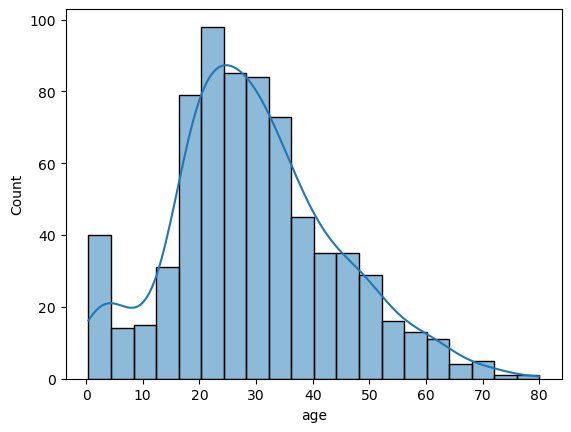

In [14]:
sns.histplot(df['age'],kde=True)

# yeh jo curve aya hai na yeh kde=True se aya hai taki mai distribution smjh sku

looks somewhat like a normal dist 

✅ Kab Mean Imputation Use Karte Hain?

Agar tum histplot / distribution plot dekhte ho aur wo:

Symmetric ho

Bell-shaped ho

Normal distribution jaisa ho

→ Toh mean se missing values fill karna best choice hota hai.

Why?

Normal distribution mein mean, median, mode almost equal hote hain.
Isliye mean imputation distribution ko disturb nahi karta.



✅ Mean se replace kyun karte hain (Age jaisa variable)?


Agar Age ka distribution normal jaisa hai, toh:


Mean = Center of the data


Bohot saari values mean ke aas-paas hoti hain


Missing age ki “true value” bhi most likely mean ke near hi hogi


Isliye agar hum missing ages ko mean se fill karte hain, toh:


🔹 Imputed value real value ke close hone ka high chance hota hai
🔹 Distribution zyada disturb nahi hota
🔹 Variance thoda reduce hota hai, but acceptable hai


In [15]:
df['age_mean']=df['age'].fillna(df['age'].mean())

In [16]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [17]:
##mean imputation works well when we have normally distributed data symm data bell shaped curve etc 

## Median value imputation  

If we have outliers in the data set

✅ Median Imputation — Use Kab Karein?


1️⃣ Jab distribution skewed ho (left ya right)


Agar data normal nahi hai aur ek taraf jhuk gaya hai →
Mean heavily shift ho jata hai, but median stable rehta hai.


2️⃣ Jab outliers present ho


Outliers mean ko disturb kar dete hain.
Median outliers se affect nahi hota ⇒ best replacement.


3️⃣ Jab numeric continuous variable ho


Age, income, price, fare, duration kind of values.


4️⃣ Jab true missing value ka guess “middle value” ke near ho


Mean skewed data mein wrong hota, median safer hota hai.


5️⃣ Small datasets


Chhote datasets mein outliers ka effect zyada hota hai → median better.

In [18]:
df['age_median']=df['age'].fillna(df['age'].median())

In [19]:
df[['age_median','age_mean','age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


✅ Mode Imputation — Use Kab Karein?

1️⃣ Jab variable categorical ho

Gender (Male/Female)


City


Payment method


Cabin class
Sabse common category se fill kar dete hain.


2️⃣ Jab discrete numeric values ho


Example:


Number of children (0,1,2…)


Ratings (1–5)


Mode best hota hai kyunki yeh “most frequent” value hoti hai.


3️⃣ Jab distribution mein outliers ya skewness irrelevant ho


Categorical data mein outliers ka concept nahi hota →
Mode safe option hai.


4️⃣ Jab missing value ka guess karna mushkil ho


Best guess = most common class.


5️⃣ Jab class imbalance zyada ho


Agar ek category 70% data hai, missing values likely usi category ki hongi → mode best.


🎯 Short Rule (easy yaad rakhne ke liye):
Data Type	Best Imputation
Normal numerical	Mean
Skewed numerical	Median
Categorical	Mode

In [20]:
df[df['embarked'].isnull()]
# df['embarked'].isnull()-- yeh jo hoga ojas ek ye ouput tru false mai dega 
# jab yahan df['embarked'].isnull() ek df aur ayega yaani  df[df['embarked'].isnull()] toh use woh rows mill jayengi jahan embarked ki value nAn hai 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [21]:
df['embarked'].unique()
# Ye command batati hai ki embarked column me kaun-kaun se alag categories present hain

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]  
# mode() → Series deta hai

# [0] → us Series ka pehla element nikaal leta hai

🔍 Step-by-step Explanation
1️⃣ df['embarked'].notna()


True/False deta hai


True = jahan embarked missing nahi hai (i.e., NaN 
nahi)


2️⃣ df[df['embarked'].notna()]


Ye dataframe ko filter karta hai


Sirf woh rows rakhta hai jahan embarked column empty nahi hai


Matlab:
👉 Missing values ko temporarily hata diya.


3️⃣ ['embarked']


Ab sirf embarked column ko select kar liya.


4️⃣ .mode()


Embarked column ka most frequent value (mode) return karta hai


Mode ek Series hota hai (list ki tarah)


5️⃣ [0]


Series ka first element le liya


Ye actual mode category hoti hai

(jaise: "S")

In [37]:
df['embarked_mode']=df['embarked'].fillna('mode_value')

In [24]:
df['embarked_mode'].isnull().sum()

np.int64(0)

In [25]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [26]:
df['embarked'].isnull().sum()

np.int64(2)

In [27]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,mode_value
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,mode_value


In [28]:
df[df['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embarked_mode
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,29.699118,28.0,Q
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,29.699118,28.0,S
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,29.699118,28.0,C
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,29.699118,28.0,C
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,29.699118,28.0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,29.699118,28.0,C
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,S
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True,29.699118,28.0,S
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,29.699118,28.0,S


In [29]:
df.isnull().sum()

survived           0
pclass             0
sex                0
age              177
sibsp              0
parch              0
fare               0
embarked           2
class              0
who                0
adult_male         0
deck             688
embark_town        2
alive              0
alone              0
age_mean           0
age_median         0
embarked_mode      0
dtype: int64

In [30]:
## abb mai khud se ek
#  baar deck waali values ko replace 
# krne ka try krta hu 

In [31]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [32]:
df['deck'].dropna().unique()

['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [33]:
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [34]:
mode_value=df[df['deck'].notna()]['deck'].mode()[0]

yeh jo upr hai it is used to calculate the mode value

In [35]:
df['deck_mode']=df['deck'].fillna(mode_value)

In [36]:
df[['deck_mode','deck']]

,deck_mode,deck
0,C,NaN
1,C,C
2,C,NaN
3,C,C
4,C,NaN
...,...,...
886,C,NaN
887,B,B
888,C,NaN
889,C,C
